# Function Approximation, using Feed-Forward Neural Networks

### The Libraries

In [1]:
import matplotlib.pyplot as plt
import torch 
import torch.quantization
import numpy as np
from sklearn.metrics import mean_squared_error
from thop import profile 
from thop import clever_format
from training import *
from feed_forward import *
from functions import *



## F0 approximation

In [2]:
%%latex
\(f_0(x):=x^2\), where \(x\in [-10, 10]\)

<IPython.core.display.Latex object>

This function f0 is just a toy example to see how functions are approximated. We use a NN with 1 layer with 4 neurons.

#### Fitting the model with all of our data for f0 

In [3]:
torch.manual_seed(34)
loss_array_f0,model_0_f0= forward_model_training_0_1(1000, 0, 10**(-1), NN0_0(), 10**(-6))

100%|██████████| 1000/1000 [00:00<00:00, 3196.52it/s]


#### Loading the data

In [4]:
Input_train_0,f0_train, Input_test_0, f0_test,  Input_data_0, f0_data =data_splitter(0) 

#### Loss vs epochs

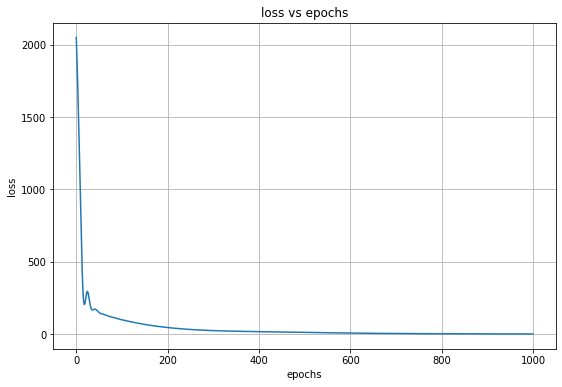

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_array_f0)), loss_array_f0)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f0_1')
plt.show()


#### Approximation vs true function 

##### Getting the approximation of f0

In [6]:
with torch.no_grad():
    f0_approx =[]
    for i in Input_data_0:

        f0_approx.append(model_0_f0.forward(i).item())


##### Ploting the result

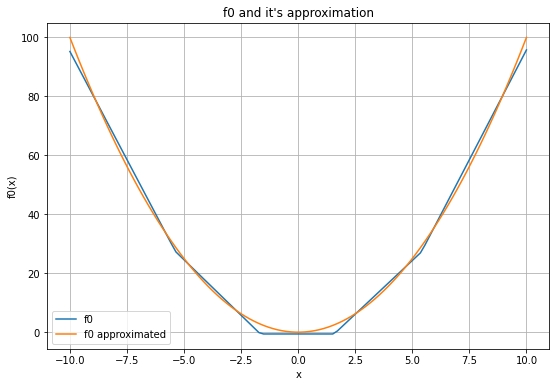

In [7]:
plt.figure(figsize=[9,6])
plt.plot(Input_data_0, f0_approx, label='f0')
plt.plot(Input_data_0, f0_data.reshape(len(Input_data_0), -1), label='f0 approximated')
plt.xlabel('x')
plt.ylabel('f0(x)')
plt.title('f0 and it\'s approximation')
plt.legend()
plt.grid()
plt.savefig('./figures/f0_approximation_1')
plt.show()


Mean-Squared Error (MSE)

In [8]:
MSE_0=min(loss_array_f0)
print(MSE_0)

2.49691104888916


## F1 approximation

In this section our goal is to compare Deep and Shallow architectures for several architectures.

In [9]:
%%latex
\(f_1(x):=xx-yy\), where \((x,y)\in \Re^2\)

<IPython.core.display.Latex object>

### Deep architectures

We have 4 architectures. With respectively, 4, 5, 7 and 10 hidden layer. All the layers contains 10 neurons

We define a commun learning rate (lr), commun epochs, and the same regularization alpha

In [10]:
lr=10**(-3)
epochs = 1000
alpha=10**(-2)

##### Training DA1, DA2, DA3 and DA4

DA1 , DA2, DA3 and DA4 have respectivelly 4, 5, 7 and 10 layers. And each layer has 10 neurons.

In [11]:
torch.manual_seed(1321512)
loss_f1_F_D_1_ReLu,model_f1_DA1 = forward_model_training_0_1(epochs, 1, lr, NN1_F_D_1_ReLu(),alpha)
loss_f1_F_D_2_ReLu, model_f1_DA2= forward_model_training_0_1(epochs, 1, lr, NN1_F_D_2_ReLu(),alpha)
loss_f1_F_D_3_ReLu,  model_f1_DA3= forward_model_training_0_1(epochs, 1, lr, NN1_F_D_3_ReLu(),alpha)
loss_f1_F_D_4_ReLu,model_f1_F_D_4_ReLu = forward_model_training_0_1(epochs, 1, lr, NN1_F_D_4_ReLu(),alpha)

100%|██████████| 1000/1000 [00:01<00:00, 523.29it/s]


##### Visualizing the training

Loss vs epochs

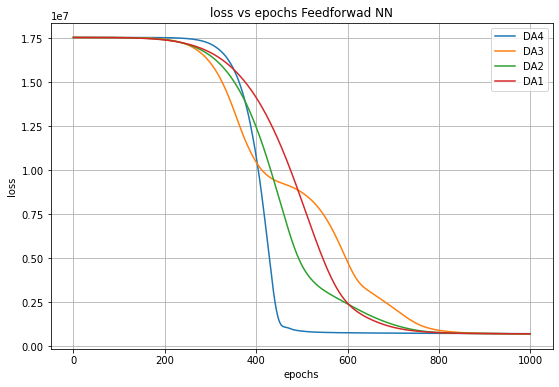

In [12]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_D_4_ReLu)), loss_f1_F_D_4_ReLu, label='DA4')
plt.plot(range(len(loss_f1_F_D_3_ReLu)), loss_f1_F_D_3_ReLu, label='DA3')
plt.plot(range(len(loss_f1_F_D_2_ReLu)), loss_f1_F_D_2_ReLu, label='DA2')
plt.plot(range(len(loss_f1_F_D_1_ReLu)), loss_f1_F_D_1_ReLu, label='DA1')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.legend()
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_F_DA123')
plt.show()

Using the log-scale to visualize better


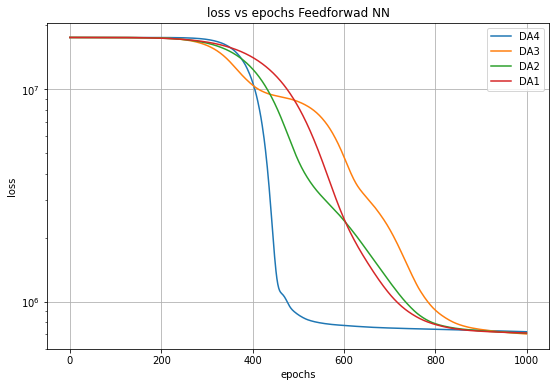

In [13]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_D_4_ReLu)), loss_f1_F_D_4_ReLu, label='DA4')
plt.plot(range(len(loss_f1_F_D_3_ReLu)), loss_f1_F_D_3_ReLu, label='DA3')
plt.plot(range(len(loss_f1_F_D_2_ReLu)), loss_f1_F_D_2_ReLu, label='DA2')
plt.plot(range(len(loss_f1_F_D_1_ReLu)), loss_f1_F_D_1_ReLu, label='DA1')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.legend()
plt.grid()
plt.yscale('log')
plt.savefig('./figures/loss_vs_epochs_f1_F_DA1234_log')
plt.show()

Best MSE 

In [14]:
mini_D=min(min(loss_f1_F_D_1_ReLu), min(loss_f1_F_D_2_ReLu),min(loss_f1_F_D_3_ReLu), min(loss_f1_F_D_4_ReLu))
L=[loss_f1_F_D_1_ReLu, loss_f1_F_D_2_ReLu,loss_f1_F_D_3_ReLu, loss_f1_F_D_4_ReLu]
for i in range(4):
    if min(L[i])== mini_D :
        print(i+1, mini_D)
        break 

3 703299.625


We can see that the best performance during training is that of DA3


### Shallow mode using ReLu

#### Single layer shallow network

First let us examin the performance of a single layer shallow model.

We choose architectures SA01, SA02, SA03 and SA04. With single layer and having repectively 40, 50, 70 and 100 layers

##### Trainining SA11, SA12, SA13 and SA14

In [15]:
torch.manual_seed(123)
loss_f1_F_S_11_ReLu, model_f1_F_S_11_ReLu = forward_model_training_0_1(epochs, 1, lr, NN0_F_S(2,40),alpha)
loss_f1_F_S_12_ReLu, model_f1_F_S_12_ReLu = forward_model_training_0_1(epochs, 1, lr, NN0_F_S(2,50),alpha)
loss_f1_F_S_13_ReLu, model_f1_F_S_13_ReLu = forward_model_training_0_1(epochs, 1, lr, NN0_F_S(2,70),alpha)
loss_f1_F_S_14_ReLu, model_f1_F_S_14_ReLu = forward_model_training_0_1(epochs, 1, lr, NN0_F_S(2,100),alpha)

100%|██████████| 1000/1000 [00:00<00:00, 1479.89it/s]


##### Visualizing the traing performances for a single layer NN

Loss vs epochs

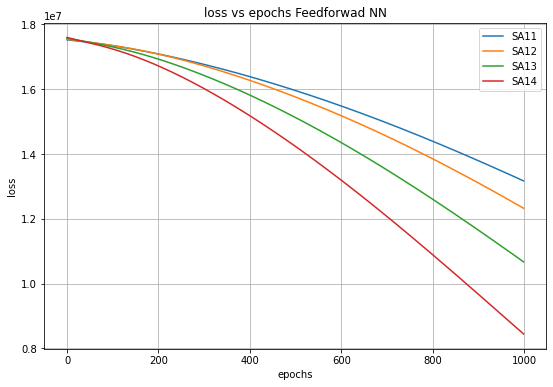

In [16]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_11_ReLu)) , loss_f1_F_S_11_ReLu , label='SA11')
plt.plot(range(len(loss_f1_F_S_12_ReLu)), loss_f1_F_S_12_ReLu , label='SA12')
plt.plot(range(len(loss_f1_F_S_13_ReLu)) , loss_f1_F_S_13_ReLu , label='SA13')
plt.plot(range(len(loss_f1_F_S_14_ReLu)), loss_f1_F_S_14_ReLu, label='SA14')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_F_SA0')
plt.show()

Using log-scale

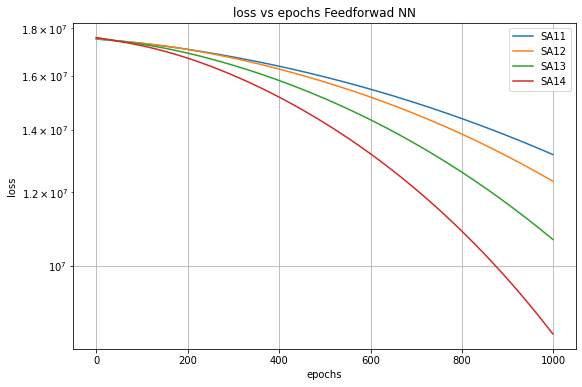

In [17]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_11_ReLu)) , loss_f1_F_S_11_ReLu , label='SA11')
plt.plot(range(len(loss_f1_F_S_12_ReLu)), loss_f1_F_S_12_ReLu , label='SA12')
plt.plot(range(len(loss_f1_F_S_13_ReLu)) , loss_f1_F_S_13_ReLu , label='SA13')
plt.plot(range(len(loss_f1_F_S_14_ReLu)), loss_f1_F_S_14_ReLu, label='SA14')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.yscale('log')
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_F_SA0')
plt.show()

Detecting the minimum

In [18]:
mini=min(min(loss_f1_F_S_11_ReLu), min(loss_f1_F_S_12_ReLu),min(loss_f1_F_S_13_ReLu), min(loss_f1_F_S_14_ReLu))
L=[loss_f1_F_S_11_ReLu, loss_f1_F_S_12_ReLu,loss_f1_F_S_13_ReLu, loss_f1_F_S_14_ReLu]
for i in range(4):
    if min(L[i])== mini :
        print(i+1, mini)
        break 

4 8446300.0


The best performance during the training is that of SA14 (100 neurons )

#### Two layers shallow network 

We have 4 architectures each having. the first one having 20, 25, 35 and 50 respectively, on each layers.

##### Training training the 4 architechtures

In [19]:
torch.manual_seed(1254)
loss_f1_F_S_21_ReLu,model_f1_F_S_21_ReLu = forward_model_training_0_1(epochs, 1, lr, NN1_F_S(2,20,20),alpha)
loss_f1_F_S_22_ReLu,model_f1_F_S_22_ReLu = forward_model_training_0_1(epochs, 1, lr, NN1_F_S(2,25,25),alpha)
loss_f1_F_S_23_ReLu, model_f1_F_S_23_ReLu = forward_model_training_0_1(epochs, 1, lr, NN1_F_S(2,35,35),alpha)
loss_f1_F_S_24_ReLu, model_f1_F_S_24_ReLu = forward_model_training_0_1(epochs, 1, lr, NN1_F_S(2,50,50),alpha)

100%|██████████| 1000/1000 [00:01<00:00, 660.48it/s]


##### Visualizing the training

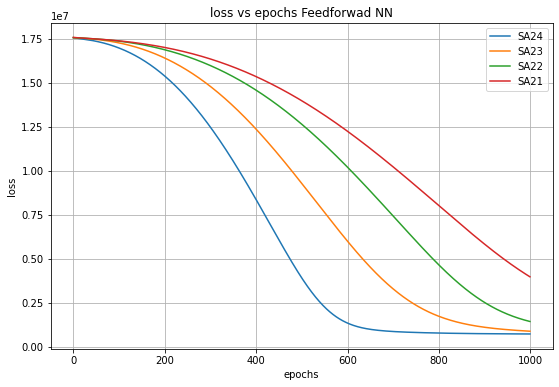

In [20]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_24_ReLu)), loss_f1_F_S_24_ReLu, label='SA24')
plt.plot(range(len(loss_f1_F_S_23_ReLu)), loss_f1_F_S_23_ReLu, label='SA23')
plt.plot(range(len(loss_f1_F_S_22_ReLu)), loss_f1_F_S_22_ReLu, label='SA22')
plt.plot(range(len(loss_f1_F_S_21_ReLu)), loss_f1_F_S_21_ReLu, label='SA21')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.legend()
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_F_SA')
plt.show()

Using log-scale

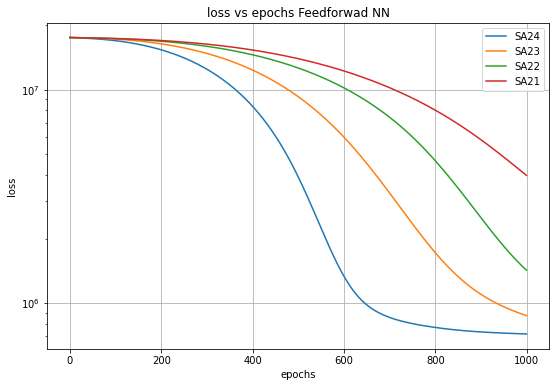

In [21]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_24_ReLu)), loss_f1_F_S_24_ReLu, label='SA24')
plt.plot(range(len(loss_f1_F_S_23_ReLu)), loss_f1_F_S_23_ReLu, label='SA23')
plt.plot(range(len(loss_f1_F_S_22_ReLu)), loss_f1_F_S_22_ReLu, label='SA22')
plt.plot(range(len(loss_f1_F_S_21_ReLu)), loss_f1_F_S_21_ReLu, label='SA21')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.yscale('log')
plt.legend()
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_F_SA')
plt.show()

Detecting the minimimum loss

In [22]:
mini_S=min(min(loss_f1_F_S_21_ReLu), min(loss_f1_F_S_22_ReLu),min(loss_f1_F_S_23_ReLu), min(loss_f1_F_S_24_ReLu))
L=[loss_f1_F_S_21_ReLu, loss_f1_F_S_22_ReLu,loss_f1_F_S_23_ReLu, loss_f1_F_S_24_ReLu]
for i in range(4):
    if min(L[i])== mini_S :
        print(i+1, mini_S)
        break 

4 715354.0


The best performance seems to that of SA24 (2 layers and 50 neurons each )

#### Comparing the single layer SA04 and the two-layer SA4

loss vs epochs

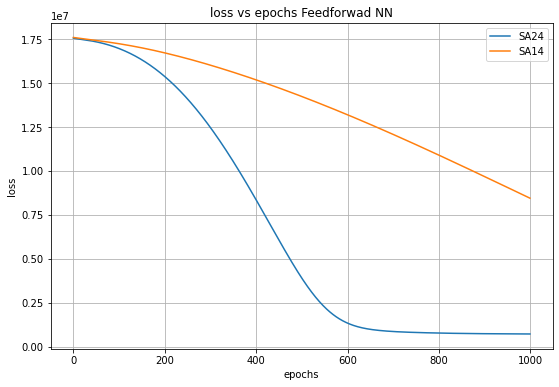

In [23]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_24_ReLu)), loss_f1_F_S_24_ReLu, label='SA24')
plt.plot(range(len(loss_f1_F_S_14_ReLu)), loss_f1_F_S_14_ReLu, label='SA14')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/SA1_vs_SA2')
plt.show()

Using log-scale

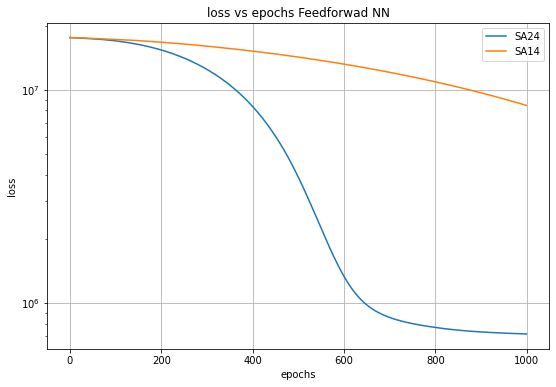

In [24]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_24_ReLu)), loss_f1_F_S_24_ReLu, label='SA24')
plt.plot(range(len(loss_f1_F_S_14_ReLu)), loss_f1_F_S_14_ReLu, label='SA14')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.yscale('log')
plt.title('loss vs epochs Feedforwad NN')

plt.grid()
plt.savefig('./figures/SA1_vs_SA2')
plt.show()

Detecting the minimum loss in shallow models

In [25]:
print('MSE SA24 = ', min(loss_f1_F_S_24_ReLu))
print('MSE SA14 = ', min(loss_f1_F_S_14_ReLu))

MSE SA24 =  715354.0
MSE SA14 =  8446300.0


We can learly see that SA24 is far better that SA14

### Comparing the performances during training for shallow and Deep approaches

We only plot the best S2A and DA

##### Loss vs epochs

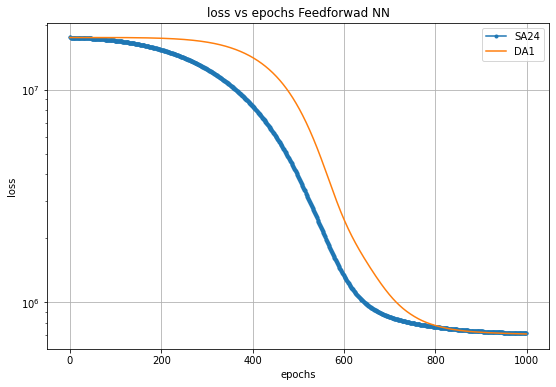

In [26]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_24_ReLu)), loss_f1_F_S_24_ReLu, label='SA24', marker='.')
plt.plot(range(len(loss_f1_F_D_3_ReLu)), loss_f1_F_D_1_ReLu, label='DA1')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.legend()
plt.yscale('log')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_F_DAs_VS_SAs')
plt.show()

Lowest MSE

In [27]:
print(f'Deep = {mini_D} ')
print(f'Shallow = {mini_S} ')

Deep = 703299.625 
Shallow = 715354.0 


The winner is shallow NNs ...

We proceed to the testing phase

### Generalization capacity

We start by loading f1's data

#### loading data

In [28]:
Input_train_1,f1_train, Input_test_1, f1_test,  Input_data_1, f1_data =data_splitter(1) 

#### Testing the best Deep architecture, DA3

We test the best Deep architechture. Which in our case is DA3 (7 layers). 

First, we plot the prediction and target function for test batch with respect to x and y

##### 2D plot 

Get the prediction with respect to x

In [29]:
with torch.no_grad():
    f1_approx_2D =[]
    for i in Input_test_1:

        f1_approx_2D.append(model_f1_DA3.forward(i).item())
        

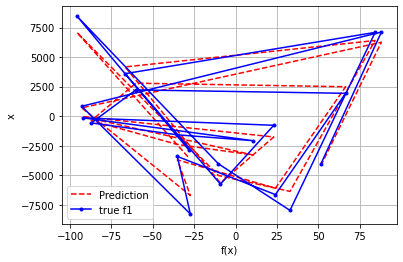

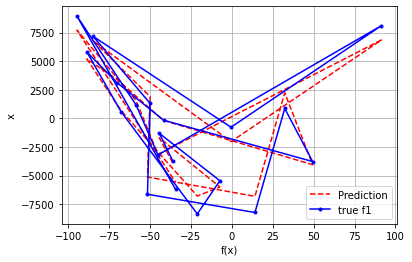

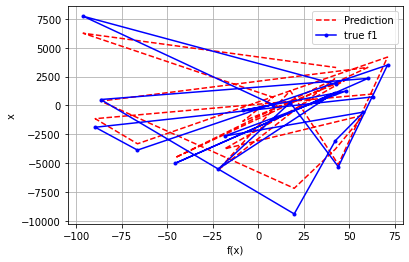

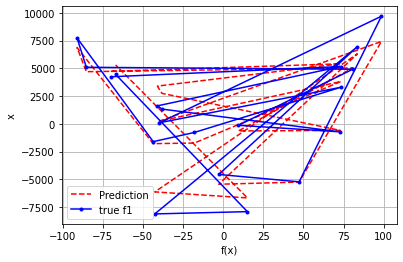

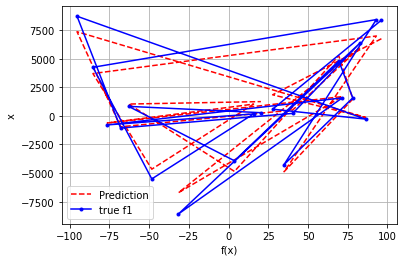

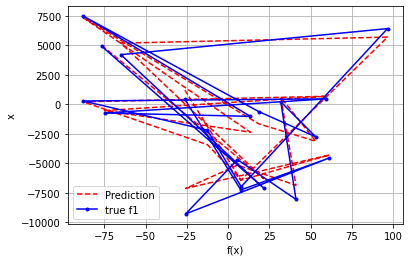

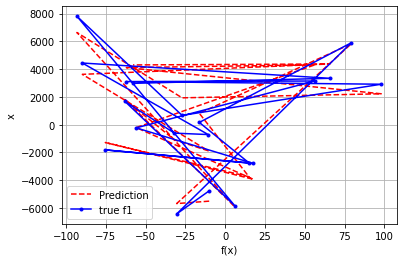

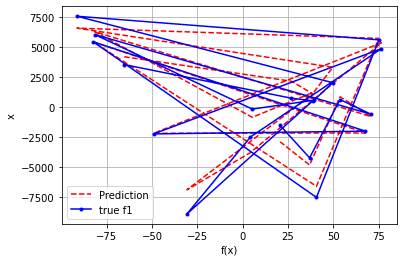

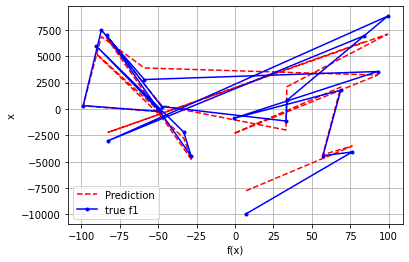

In [30]:
for i in range(1,10):

    plt.plot(Input_test_1[(i-1)*20:i*20,0], f1_approx_2D[(i-1)*20:i*20], label='Prediction', ls=('dashed'), color='r')
    plt.plot(Input_test_1[(i-1)*20:i*20,0], f1_test[(i-1)*20:i*20], label='true f1', marker='.', color='b')
    plt.xlabel('f(x)')
    plt.ylabel('x')
    plt.legend()
    plt.grid()
    plt.show()

Get the prediction with respect to y

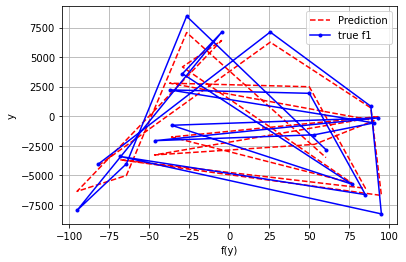

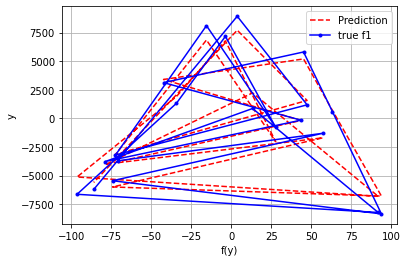

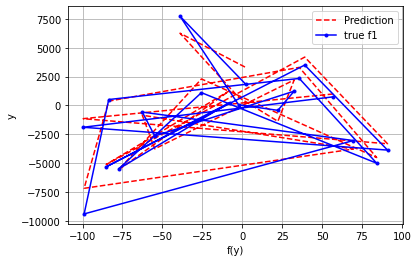

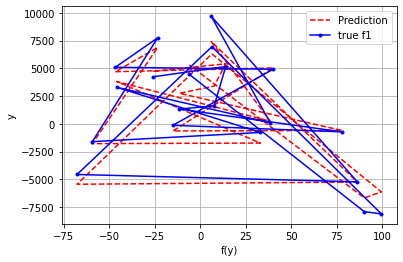

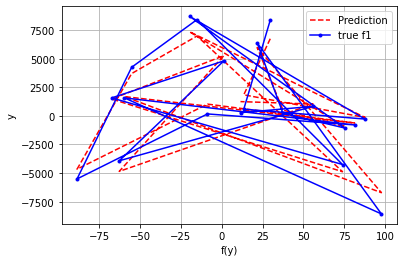

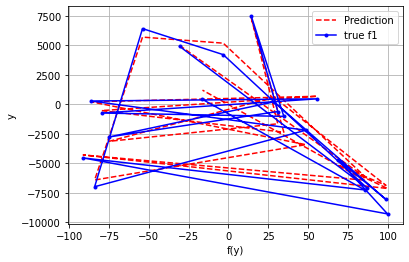

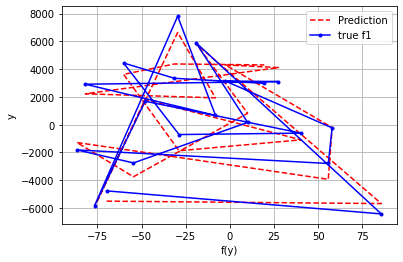

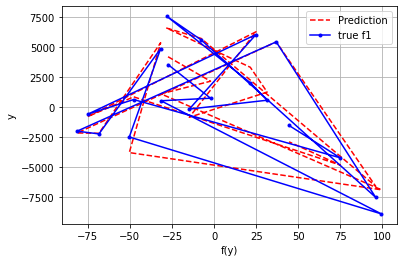

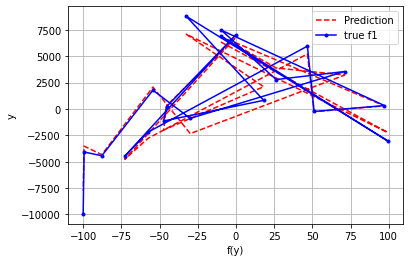

In [31]:
for i in range(1,10):

    plt.plot(Input_test_1[(i-1)*20:i*20,1], f1_approx_2D[(i-1)*20:i*20], label='Prediction', ls=('dashed'), color='r')
    plt.plot(Input_test_1[(i-1)*20:i*20,1], f1_test[(i-1)*20:i*20], label='true f1', marker='.', color='b')
    plt.xlabel('f(y)')
    plt.ylabel('y')
    plt.legend()
    plt.grid()
    plt.show()

##### 3D plot

In [32]:
X,Y=np.meshgrid(Input_test_1[:,0].numpy(), Input_test_1[:,1].numpy())

In [33]:
grid=torch.Tensor(np.c_[X.ravel(),Y.ravel()]) 

with torch.no_grad():
    
    f1_approx =model_f1_DA3.forward(grid)
    grid_f1_approx=f1_approx.view(X.shape).numpy() 

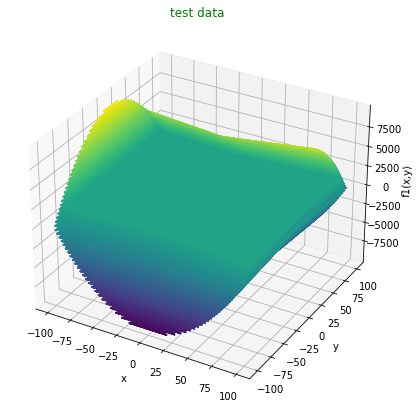

In [34]:
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, f1(X, Y), 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f1(x,y)')
ax.set_title('test data', color='g')
plt.savefig('figures/f1_test_F_DA3')
plt.show()

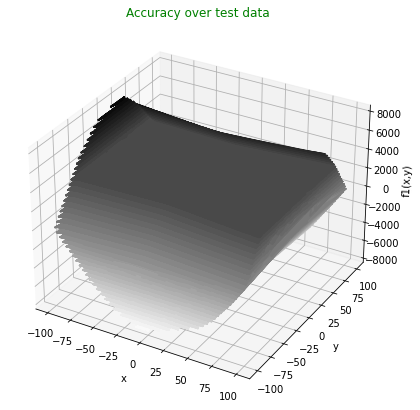

In [35]:
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, grid_f1_approx, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f1(x,y)')
ax.set_title('Accuracy over test data', color='g')
plt.show()

##### Total error (MSE)

In [36]:
TE_D=mean_squared_error(np.array(f1_approx_2D), np.array(f1_test))
print(TE_D)

789602.8609933899


#### Testing the best Shallow architecture, SA23

##### 2D plot

Get prediction with repect to x

In [37]:
with torch.no_grad():
    f1_approx_S_2D =[]
    for i in Input_test_1:
        f1_approx_S_2D.append(model_f1_F_S_23_ReLu.forward(i).item())
        

Visualizing the plot 

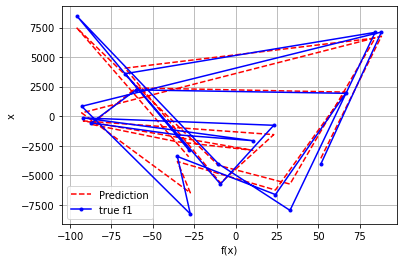

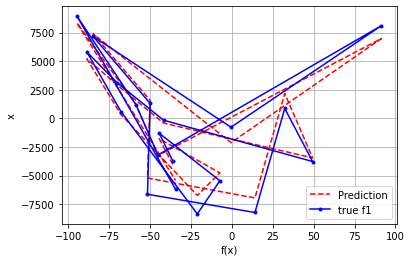

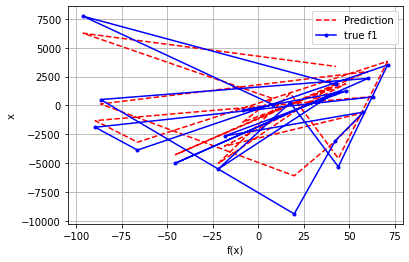

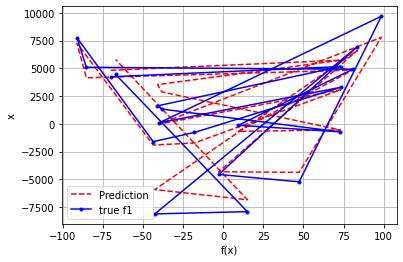

In [38]:
for i in range(1,5):

    plt.plot(Input_test_1[(i-1)*20:i*20,0], f1_approx_S_2D[(i-1)*20:i*20], label='Prediction', ls=('dashed'), color='r')
    plt.plot(Input_test_1[(i-1)*20:i*20,0], f1_test[(i-1)*20:i*20], label='true f1', marker='.', color='b')

    plt.xlabel('f(x)')
    plt.ylabel('x')
    plt.legend()
    plt.grid()
    plt.show()

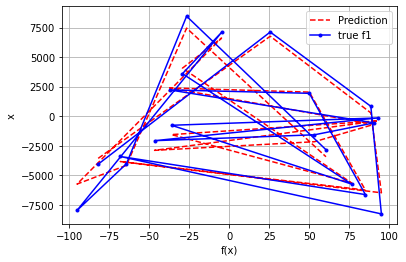

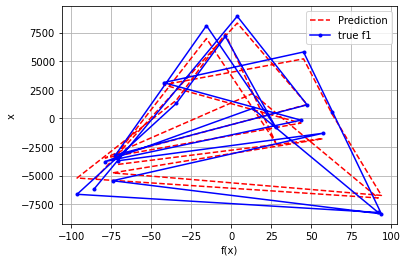

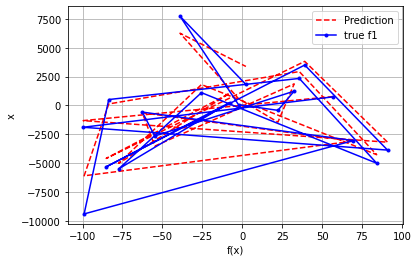

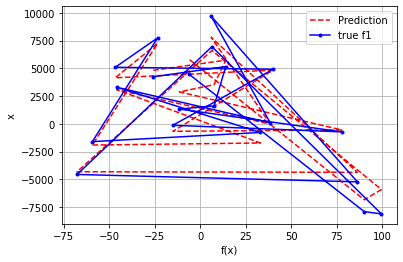

In [39]:
for i in range(1,5):

    plt.plot(Input_test_1[(i-1)*20:i*20,1], f1_approx_S_2D[(i-1)*20:i*20], label='Prediction', ls=('dashed'), color='r')
    plt.plot(Input_test_1[(i-1)*20:i*20,1], f1_test[(i-1)*20:i*20], label='true f1', marker='.', color='b')

    plt.xlabel('f(x)')
    plt.ylabel('x')
    plt.legend()
    plt.grid()
    plt.show()

##### 3D visualization

In [40]:
grid=torch.Tensor(np.c_[X.ravel(),Y.ravel()]) 

with torch.no_grad():
    
    f1_approx_S =model_f1_F_S_23_ReLu.forward(grid)
    grid_f1_approx_S=f1_approx_S.view(X.shape).numpy() 

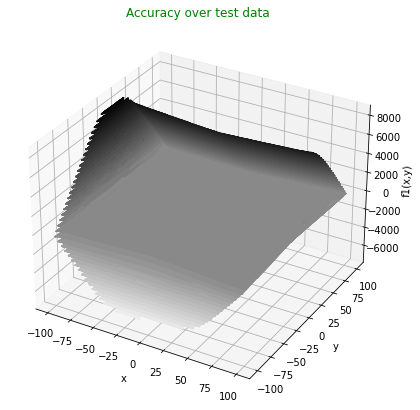

In [41]:
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, grid_f1_approx_S, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f1(x,y)')
ax.set_title('Accuracy over test data', color='g')
plt.show()

##### Total error (MSE)

In [42]:
TE_S=mean_squared_error(np.array(f1_approx_S_2D), np.array(f1_test))
print(TE_S)

895314.8675050779


Total error for Shallow and Deep model

In [43]:
print('TE_S', TE_S)
print('TE_D', TE_D)

TE_S 895314.8675050779
TE_D 789602.8609933899


### The f1's Approximator

Our best approach appears to be a shallow architecture with 2 layers and a maximum of neurons. 
Next, we will increase the number of neuros in each layer. As well as adding more regularization to avoid overffiting (we shall increase the epochs).
And we will as well quantize the model's weight and activations to 8 bits. And make sure that the Acumulators do not exceed 19 bits.

300 neurons per layer

#### Training 

In [44]:
loss_f1_F_ReLu, model_f1_F_ReLu = forward_model_training_0_1(1000, 1, lr, NN1_F_S(2,300,300), 10**(-1))

100%|██████████| 1000/1000 [00:11<00:00, 85.24it/s]


##### Loss vs epochs

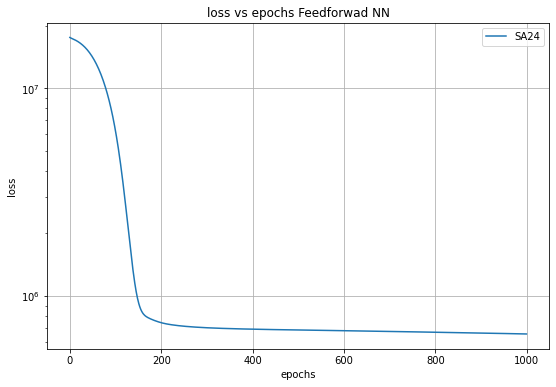

In [45]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_ReLu)), loss_f1_F_ReLu, label='SA24')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.legend()
plt.yscale('log')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1')
plt.show()

Get the approximation 

In [46]:
with torch.no_grad():
    f1_approx_F =[]
    for i in Input_test_1:
        f1_approx_F.append(model_f1_F_ReLu.forward(i).item())

computing the accuracy

In [47]:
TE_f1_F=mean_squared_error(np.array(f1_approx_F), np.array(f1_test))
print('TE_f1_F',TE_f1_F)
print('TE_S',TE_S)
print('TE_D',TE_D)

TE_f1_F 746684.6500499881
TE_S 895314.8675050779
TE_D 789602.8609933899


#### Visualization of the final function 

In [48]:
x1=np.linspace(-10**(3), 10**(3), 10**(3))
y1=np.linspace(-10**(3), 10**(3), 10**(3))
X1, Y1 = np.meshgrid(x1, y1)

In [49]:
grid=torch.Tensor(np.c_[X1.ravel(),Y1.ravel()]) 

with torch.no_grad():
    
    f1_approx_Final =model_f1_F_ReLu.forward(grid)
    grid_f1_approx_Final=f1_approx_Final.view(X1.shape).numpy() 

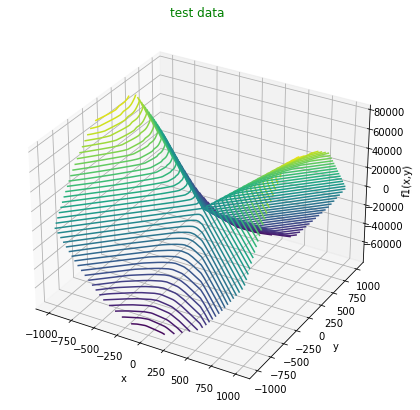

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X1, Y1, grid_f1_approx_Final, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f1(x,y)')
ax.set_title('test data', color='g')
plt.savefig('figures/f1_F_result')
plt.show()

### Quantizing f1's approximator 

Here we use dynamic quantization: the pretrained model is quantized.

In [51]:
torch.backends.quantized.engine = 'qnnpack'
NN1_F_S_to_be_quantized=model_f1_F_ReLu
model_int8_f1 = torch.quantization.quantize_dynamic(
    model_f1_F_ReLu,  # the original model
    {torch.nn.Linear},  # a set of layers to dynamically quantize
    dtype=torch.qint8)

[W TensorImpl.h:1408] Warning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (function operator())


#### Accuracy for quantized model 

Getting the approximation 

In [52]:
with torch.no_grad():
    f1_approx_F_Quant=model_int8_f1.forward(Input_test_1)

MSE for quntized and non-quantized model 

In [53]:
TE_f1_F_Quant=mean_squared_error(np.array(f1_approx_F_Quant), np.array(f1_test))
print('Quantized model performance : ', TE_f1_F_Quant)
print('Non Quantized model performance : ',TE_f1_F)


Quantized model performance :  741935.0
Non Quantized model performance :  746684.6500499881


Drawbacks

In [54]:
print(f'Performance reduction : {np.ceil(100*(TE_f1_F_Quant-TE_f1_F)/TE_f1_F)} %')

Performance reduction : -0.0 %


MACS 

This cell doesn't work

In [55]:
##macs, params = profile(model_int8_f1, inputs=(Input_test_1, ))
##macs, params = clever_format([macs, params], "%.3f")
##macs, params

## F2 approximation 

A compositional function --> we focus on Deep Neural networs. 

In [56]:
%%latex
\(f_2(x,y):=xye^{-(xx+yy)}\),  where \((x,y)\in [-4, 4]\)

<IPython.core.display.Latex object>

### Deep architectures

We use the same for architures used previously. DA2, DA3 and DA4.

In [57]:
lr=10**(-2)
epochs = 100
alpha=0

#### Training the 3 architectures.

In [58]:
torch.manual_seed(274996)
loss_f2_F_D_2_ReLu, model_f2_DA2= forward_model_training_2(epochs, 2, lr, NN1_F_D_2_ReLu(2, 100),alpha)
loss_f2_F_D_3_ReLu,  model_f2_DA3= forward_model_training_2(epochs, 2, lr, NN1_F_D_3_ReLu(2, 100),alpha)
loss_f2_F_D_4_ReLu,model_f2_F_DA4 = forward_model_training_2(epochs, 2, lr, NN1_F_D_4_ReLu(2, 100),alpha)

100%|██████████| 100/100 [00:01<00:00, 67.19it/s]


#### Visualizing the training

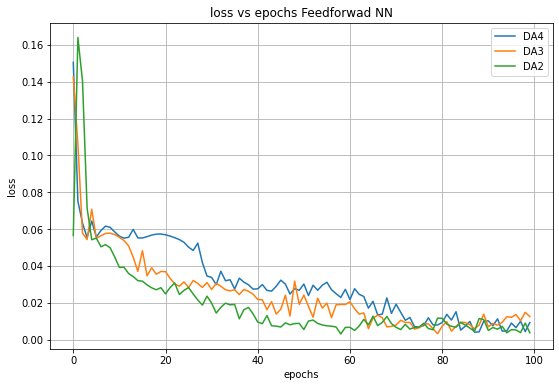

In [59]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f2_F_D_4_ReLu)), loss_f2_F_D_4_ReLu, label='DA4')
plt.plot(range(len(loss_f2_F_D_3_ReLu)), loss_f2_F_D_3_ReLu, label='DA3')
plt.plot(range(len(loss_f2_F_D_2_ReLu)), loss_f2_F_D_2_ReLu, label='DA2')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.legend()
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f2_F_DA123')
plt.show()

Log-scale 

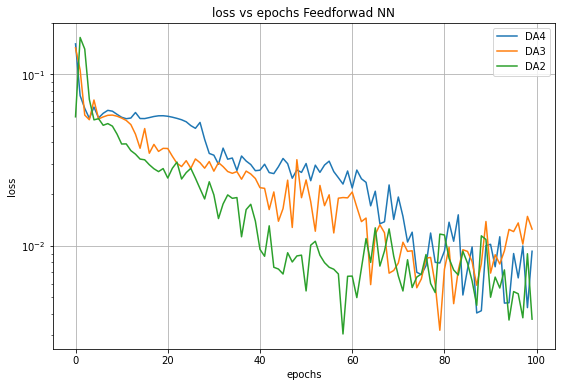

In [60]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f2_F_D_4_ReLu)), loss_f2_F_D_4_ReLu, label='DA4')
plt.plot(range(len(loss_f2_F_D_3_ReLu)), loss_f2_F_D_3_ReLu, label='DA3')
plt.plot(range(len(loss_f2_F_D_2_ReLu)), loss_f2_F_D_2_ReLu, label='DA2')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.yscale('log')
plt.legend()
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f2_F_DA123_logscale')
plt.show()

Best MSE

In [61]:
mini_D_2=min( min(loss_f2_F_D_2_ReLu),min(loss_f2_F_D_3_ReLu), min(loss_f2_F_D_4_ReLu))
L=[loss_f2_F_D_2_ReLu,loss_f2_F_D_3_ReLu, loss_f2_F_D_4_ReLu]
for i in range(4):
    if min(L[i])== mini_D_2 :
        print(f'DA{i+2} has the minimum with MSE {mini_D_2}')
        break 

DA2 has the minimum with MSE 0.0030535943806171417


### Generalization capacity 

First we start by loading the data 

In [62]:
Input_train_2, f2_train, Input_test_2, f2_test,  Input_data_2, f2_data =data_splitter(2) 

In [63]:
np.shape(Input_train_2)

torch.Size([670, 2])

The chosen architechture is the DA2 (2 layers)

#### 2D viualisation 

Getting the prediction 

In [64]:
with torch.no_grad():
    f2_approx_2D =[]
    for i in Input_test_2:

        f2_approx_2D.append(model_f2_DA2.forward(i).item())

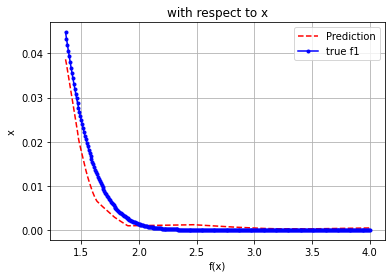

In [65]:

plt.plot(Input_test_2[:,0], f2_approx_2D, label='Prediction', ls=('dashed'), color='r')
plt.plot(Input_test_2[:,0], f2_test, label='true f1', marker='.', color='b')
plt.xlabel('f(x)')
plt.ylabel('x')
plt.title('with respect to x')
plt.legend()
plt.grid()
plt.show()

with respect to y 

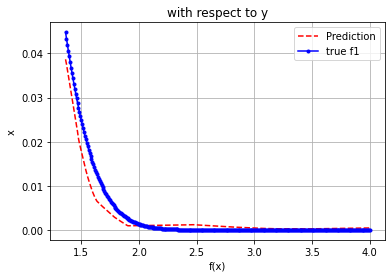

In [66]:
plt.plot(Input_test_2[:,1], f2_approx_2D, label='Prediction', ls=('dashed'), color='r')
plt.plot(Input_test_2[:,1], f2_test, label='true f1', marker='.', color='b')
plt.xlabel('f(x)')
plt.ylabel('x')
plt.title('with respect to y')
plt.legend()
plt.grid()
plt.show()

#### 3D visualization 

In [67]:
X2,Y2=np.meshgrid(Input_test_2[:,0].numpy(), Input_test_2[:,1].numpy())

In [68]:
grid_2=torch.Tensor(np.c_[Y2.ravel(),X2.ravel()]) 

with torch.no_grad():
    
    f2_approx =model_f2_DA2.forward(grid_2)
    grid_f2_approx=f2_approx.view(X2.shape).numpy() 

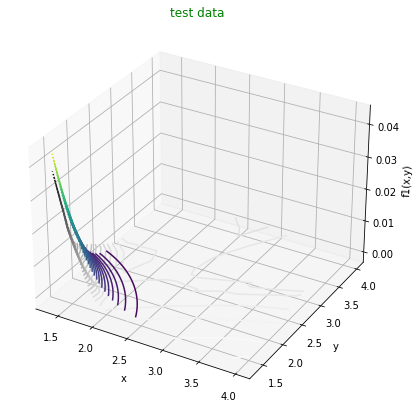

In [69]:
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X2, Y2, f2(X2, Y2), 50, cmap='viridis', label='true function')
ax.contour3D(X2, Y2, grid_f2_approx, 50, cmap='binary', label='approximated function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f1(x,y)')
ax.set_title('test data', color='g')
plt.savefig('figures/f2_test_F_DA2')
plt.show()

#### Final function

In [70]:
X2,Y2=np.meshgrid(Input_data_2[:,0].numpy(), Input_data_2[:,1].numpy())
grid_2_final=torch.Tensor(np.c_[Y2.ravel(),X2.ravel()]) 

with torch.no_grad():
    
    f2_approx_final =model_f2_DA2.forward(grid_2_final)
    grid_f2_approx_final=f2_approx_final.view(X2.shape).numpy() 

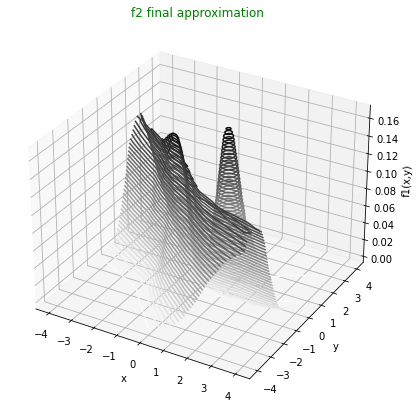

In [71]:
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X2, Y2, grid_f2_approx_final, 50, cmap='binary', label='approximated function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f1(x,y)')
ax.set_title('f2 final approximation', color='g')
plt.savefig('figures/f2_final_approximation')
plt.show()

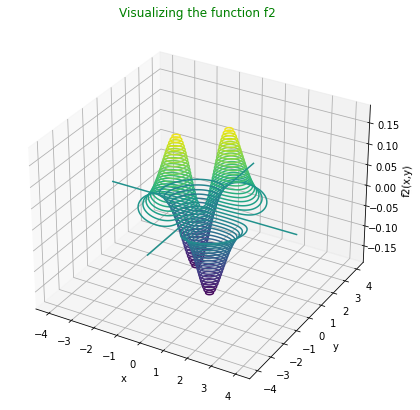

In [72]:
Z2 = f2(X2, Y2)
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X2, Y2, Z2, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f2(x,y)')
ax.set_title('Visualizing the function f2', color='g')
plt.savefig('figures/f2_plot')
plt.show()

#### Quantizing the model 

In [73]:
torch.backends.quantized.engine = 'qnnpack'
NN2_to_be_quantized=model_f1_F_ReLu
model_int8_f2 = torch.quantization.quantize_dynamic(
    model_f2_DA2,  # the original model
    {torch.nn.Linear},  # a set of layers to dynamically quantize
    dtype=torch.qint8)